# Analisis Exploratorio de datos

In [1]:
# Se Importan las librerias correspondientes para realizar el analisis
import pandas as pd
import ast
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import missingno as msno
from collections import Counter



In [2]:
# Extraigo los datos de los dataframe
credits_df_parquet = pd.read_parquet('../Datasets/credits_dataset_parquet')
movies_df_parquet = pd.read_parquet('../Datasets/movies_dataset_parquet')

In [3]:
# Uno los dataframes para realizar el analisis de datos con mas precision

dataframe_unido = pd.merge(movies_df_parquet, credits_df_parquet, left_on='id_movies', right_on='id_credits', how='left')

### 1. Vision general de los datos 

In [4]:
# Obtengo una descripcion estadistica general de las variables numericas y categoricas
dataframe_unido.describe(include='all')


,budget,id_movies,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,...,cast_id_actor,cast_name_actor,cast_order_credit,crew_credit_id,crew_department,crew_gender,crew_id_member,crew_job,crew_name_member,crew_profile_path_member
count,3.317600e+04,33176.000000,33176,33040,33176.000000,33176,3.317600e+04,33145.000000,33108,18161,...,3.124000e+04,31240,31240.000000,32562,32562,33175.000000,3.256200e+04,32562,32562,15375
unique,NaN,NaN,2,32952,NaN,NaN,NaN,NaN,6,18061,...,NaN,12944,NaN,32562,12,NaN,NaN,179,15600,4857
top,NaN,NaN,en,No overview found.,NaN,NaN,NaN,NaN,Released,Based on a true story.,...,NaN,John Wayne,NaN,52fe4284c3a36847f8024f49,Directing,NaN,NaN,Director,Avy Kaufman,/yQPGktsmkKkhkOQAUlmYlxHJOiJ.jpg
freq,NaN,NaN,32184,64,NaN,NaN,NaN,NaN,32858,6,...,NaN,93,NaN,1,18321,NaN,NaN,18294,120,120
mean,5.471293e+06,105226.349891,NaN,NaN,3.327814,1991-11-20 03:49:18.476006784,1.478642e+07,93.139508,NaN,NaN,...,1.771787e+05,NaN,0.143150,NaN,NaN,1.272916,2.133022e+05,NaN,NaN,NaN
min,0.000000e+00,5.000000,NaN,NaN,0.000000,1878-06-14 00:00:00,0.000000e+00,0.000000,NaN,NaN,...,1.000000e+00,NaN,0.000000,NaN,NaN,0.000000,1.000000e+00,NaN,NaN,NaN
25%,0.000000e+00,24407.250000,NaN,NaN,0.410000,1978-10-25 00:00:00,0.000000e+00,85.000000,NaN,NaN,...,6.886000e+03,NaN,0.000000,NaN,NaN,0.000000,6.345000e+03,NaN,NaN,NaN
50%,0.000000e+00,54937.000000,NaN,NaN,1.240000,2001-03-01 00:00:00,0.000000e+00,93.000000,NaN,NaN,...,2.773750e+04,NaN,0.000000,NaN,NaN,2.000000,3.616900e+04,NaN,NaN,NaN
75%,0.000000e+00,152736.250000,NaN,NaN,4.720000,2010-11-05 00:00:00,0.000000e+00,105.000000,NaN,NaN,...,9.077375e+04,NaN,0.000000,NaN,NaN,2.000000,1.147418e+05,NaN,NaN,NaN
max,3.800000e+08,467731.000000,NaN,NaN,547.490000,2020-12-16 00:00:00,2.787965e+09,1256.000000,NaN,NaN,...,1.902699e+06,NaN,24.000000,NaN,NaN,2.000000,1.907940e+06,NaN,NaN,NaN


In [5]:
# reviso el nombre y tipo de dato de las columnas
print(dataframe_unido.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33176 entries, 0 to 33175
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   budget                      33176 non-null  int64         
 1   id_movies                   33176 non-null  int64         
 2   original_language           33176 non-null  object        
 3   overview                    33040 non-null  object        
 4   popularity                  33176 non-null  float64       
 5   release_date                33176 non-null  datetime64[ns]
 6   revenue                     33176 non-null  float64       
 7   runtime                     33145 non-null  float64       
 8   status                      33108 non-null  object        
 9   tagline                     18161 non-null  object        
 10  title                       33176 non-null  object        
 11  vote_average                33176 non-null  float64   

### 2. Observacion y tratamiento de los Datos faltantes

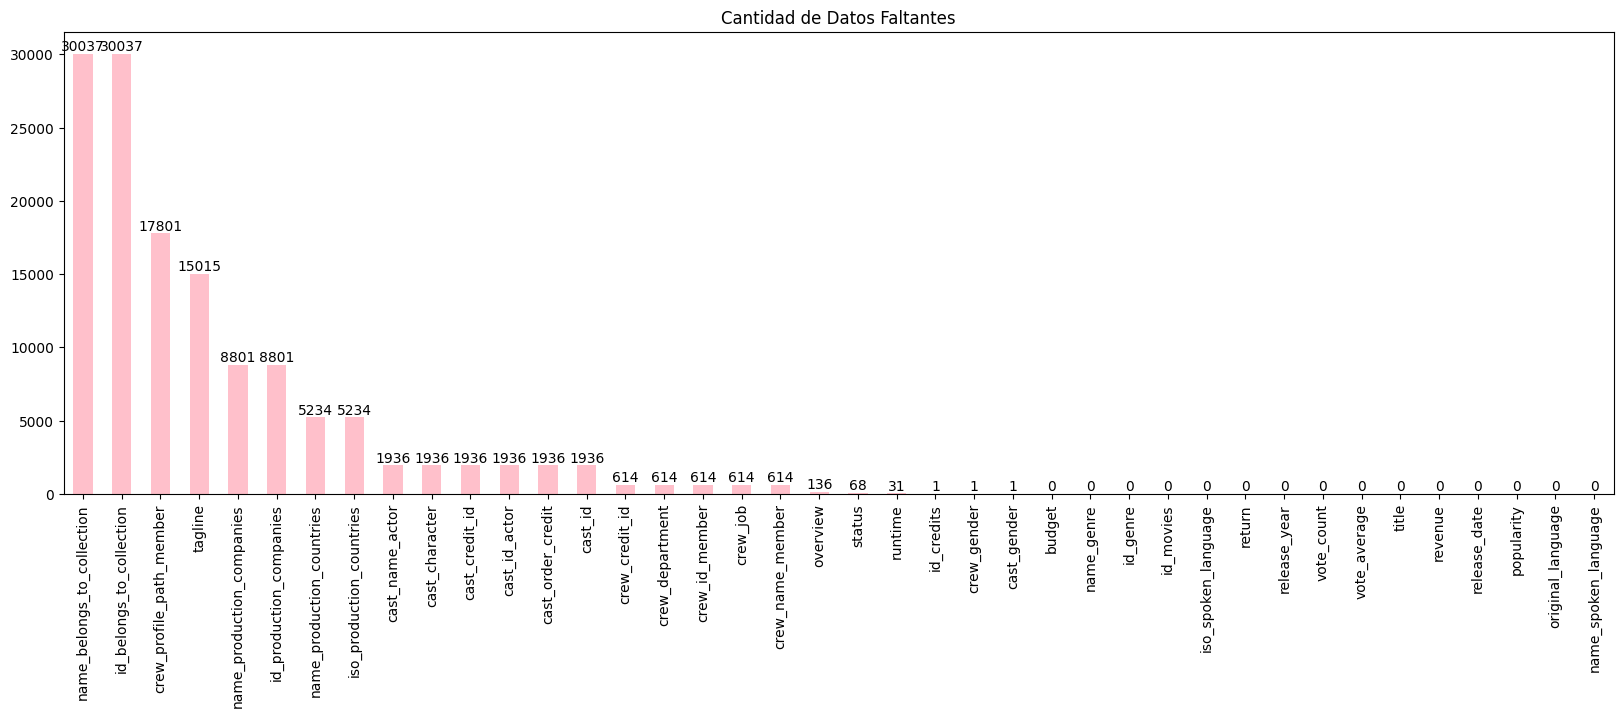

In [6]:
# Calculo la cantidad de valores faltantes en cada columna
datos_faltantes = dataframe_unido.isnull().sum()

# Grafico los datos faltantes
plt.figure(figsize=(20, 6))
ax = datos_faltantes.sort_values(ascending=False).plot(kind='bar', color='pink')

# Añado etiquetas en el gráfico para mayor claridad de visualizacion
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.title('Cantidad de Datos Faltantes')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=90)
plt.show()

In [7]:
# calculo el porcentaje de datos faltantes en cada columna

porcentaje_de_datos_faltantes = dataframe_unido.isnull().mean() * 100
print(porcentaje_de_datos_faltantes)

budget                         0.000000
id_movies                      0.000000
original_language              0.000000
overview                       0.409935
popularity                     0.000000
release_date                   0.000000
revenue                        0.000000
runtime                        0.093441
status                         0.204967
tagline                       45.258621
title                          0.000000
vote_average                   0.000000
vote_count                     0.000000
release_year                   0.000000
return                         0.000000
id_belongs_to_collection      90.538341
name_belongs_to_collection    90.538341
id_production_companies       26.528213
name_production_companies     26.528213
iso_spoken_language            0.000000
name_spoken_language           0.000000
iso_production_countries      15.776465
name_production_countries     15.776465
id_genre                       0.000000
name_genre                     0.000000


#### Revisando los graficos se toma la decision de quitar las columnas donde sus datos faltantes sean mayores al 10%, ademas se observa que estas columnas tampoco van a ser significativas al momento de realizar el modelo

In [8]:
# Identifico las columnas con más del 10% de datos faltantes
columnas_a_eliminar = porcentaje_de_datos_faltantes[porcentaje_de_datos_faltantes > 10].index

# Elimino las columnas identificadas
dataframe_unido = dataframe_unido.drop(columns=columnas_a_eliminar)

# Observo las columnas eliminadas y el nuevo DataFrame
print("Columnas eliminadas con mas del 10% de datos faltantes:")
print(columnas_a_eliminar)

print("\nDataFrame sin las columnas eliminadas:")
print(dataframe_unido.info())




Columnas eliminadas con mas del 10% de datos faltantes:
Index(['tagline', 'id_belongs_to_collection', 'name_belongs_to_collection',
       'id_production_companies', 'name_production_companies',
       'iso_production_countries', 'name_production_countries',
       'crew_profile_path_member'],
      dtype='object')

DataFrame sin las columnas eliminadas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33176 entries, 0 to 33175
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                33176 non-null  int64         
 1   id_movies             33176 non-null  int64         
 2   original_language     33176 non-null  object        
 3   overview              33040 non-null  object        
 4   popularity            33176 non-null  float64       
 5   release_date          33176 non-null  datetime64[ns]
 6   revenue               33176 non-null  float64       
 7   runtime

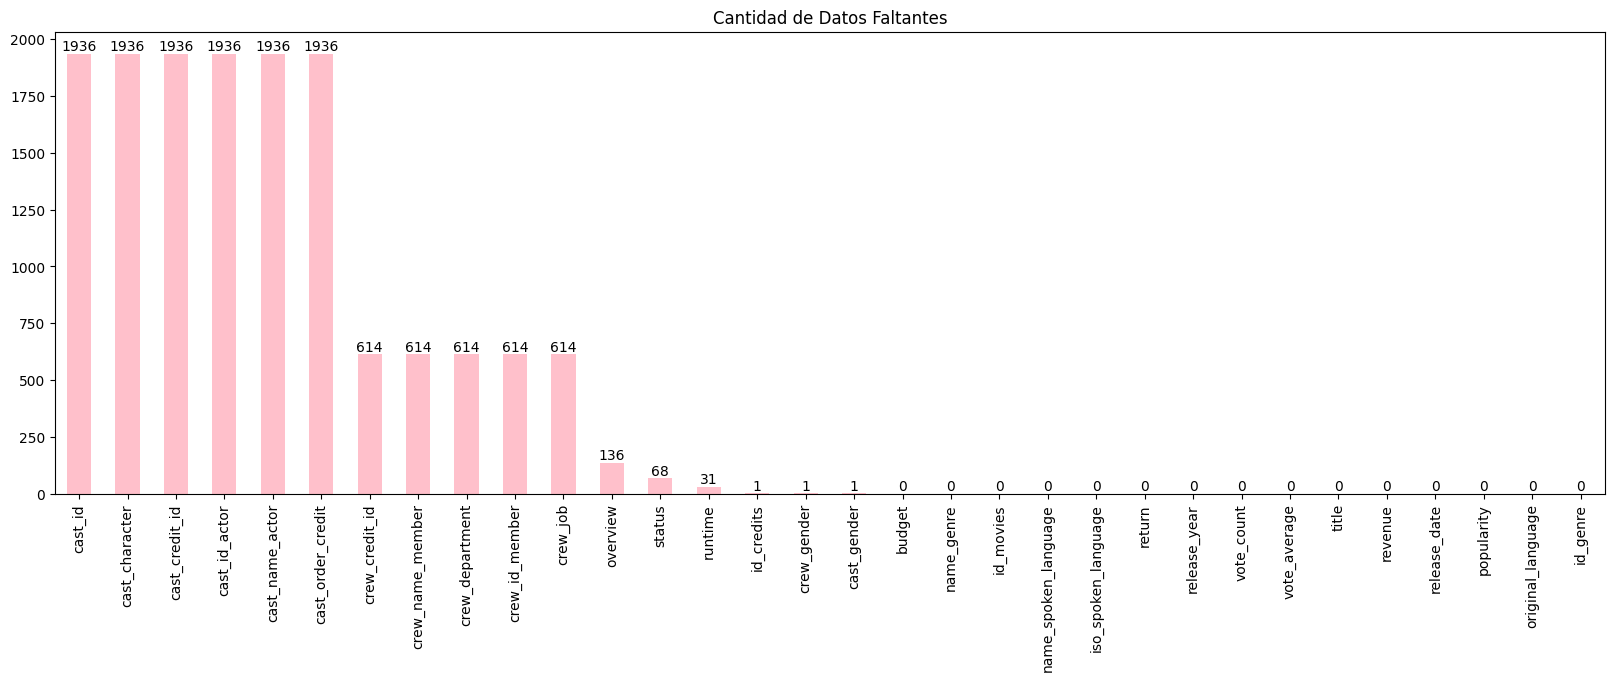

In [9]:
# calculo la nueva cantidad de valores faltantes en cada columna
datos_faltantes = dataframe_unido.isnull().sum()

# Grafico nuevamente los datos faltantes
plt.figure(figsize=(20, 6))
ax = datos_faltantes.sort_values(ascending=False).plot(kind='bar', color='pink')

# Añado las etiquetas de cantidad en el grafico para mejor visualizacion
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.title('Cantidad de Datos Faltantes')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=90)
plt.show()

### 3. Distribucion de variables numericas

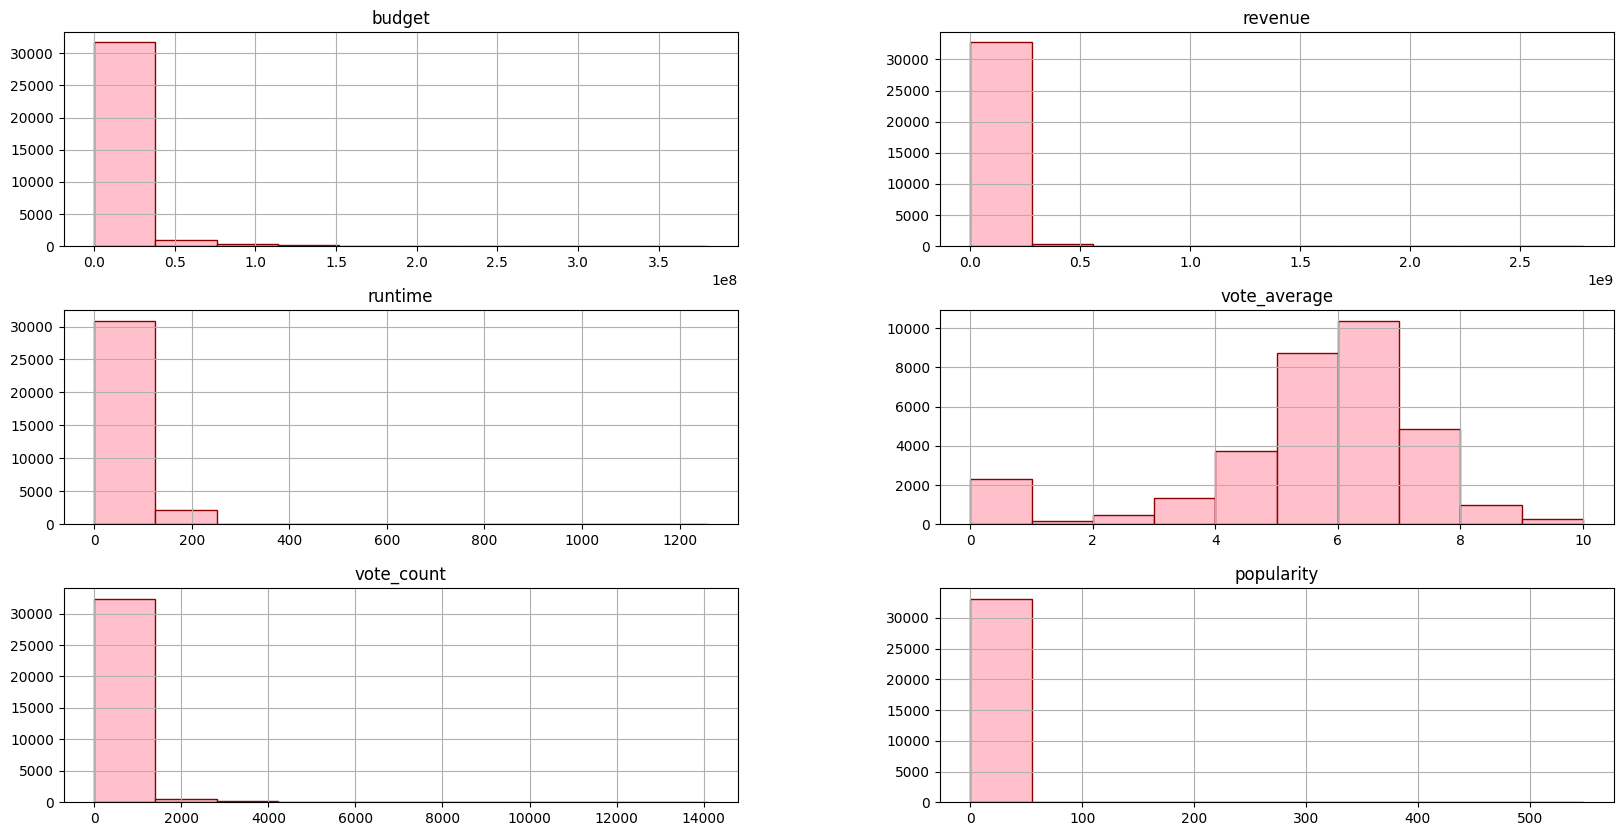

In [10]:
# Hago histogramas para visualizar la distribucion de las variables numericas
dataframe_unido[['budget', 'revenue', 'runtime', 'vote_average', 'vote_count','popularity']].hist(
    figsize=(20, 10),
    color='pink',
    edgecolor='darkred'
)

plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Analisis de cada histograma:

* budget (presupuesto):

Eje X: Representa los valores del presupuesto de las peliculas (en una escala grande, dado que hay peliculas con presupuestos multimillonarios).
Eje Y: Representa la cantidad de peliculas con un presupuesto específico.
Observación: La mayoria de las peliculas tienen un presupuesto bajo, concentrándose en el lado izquierdo del gráfico. Hay muy pocas peliculas con presupuestos extremadamente altos, Lo que explica el sesgo positivo a la derecha

* revenue (recaudacion):

Eje X: Representa los ganancias en dólares.
Eje Y: Representa la cantidad de peliculas con ciertos niveles de ganancias.
Observación: Similar al presupuesto, la mayoria de las peliculas tienen ganancias bajas, con unas pocas excepciones de peliculas con ingresos muy altos, Lo que explica el sesgo positivo a la derecha

* runtime (duracion):

Eje X: Tiempo de duracion de las peliculas en minutos.
Eje Y: Numero de peliculas con esa duracion.
Observación: La mayoria de las peliculas duran entre 90 y 200 minutos, con muy pocas peliculas con duraciones extremas, Lo que explica el sesgo positivo a la derecha

* vote_average (promedio de votos):

Eje X: Puntuación media que han recibido las peliculas (de 0 a 10).
Eje Y: Numero de peliculas que han recibido cierto promedio de votos.
Observación: La mayoria de las peliculas tiene un promedio de entre 6 y 8, lo cual sugiere que muchas peliculas obtienen una valoración media o ligeramente superior, se podria hablar 
de un histograma bimodal al tener dos picos uno en el 0 y el siguiente entre 6 y 7 de promedio de votos.

* vote_count (cantidad de votos):

Eje X: Numero de votos recibidos.
Eje Y: Frecuencia de peliculas con un cierto numero de votos.
Observación: La mayoria de las peliculas tienen pocos votos, con unas pocas peliculas extremadamente votadas, Lo que explica el sesgo positivo a la derecha.

* popularity (popularidad):

Eje X: Mide la popularidad de las peliculas.
Eje Y: Frecuencia de peliculas según su nivel de popularidad.
Observación: La popularidad se concentra en el lado izquierdo, lo que indica que la mayoria de las películas tienen una popularidad baja, con solo unas pocas películas siendo altamente populares, Lo que explica el sesgo positivo a la derecha.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

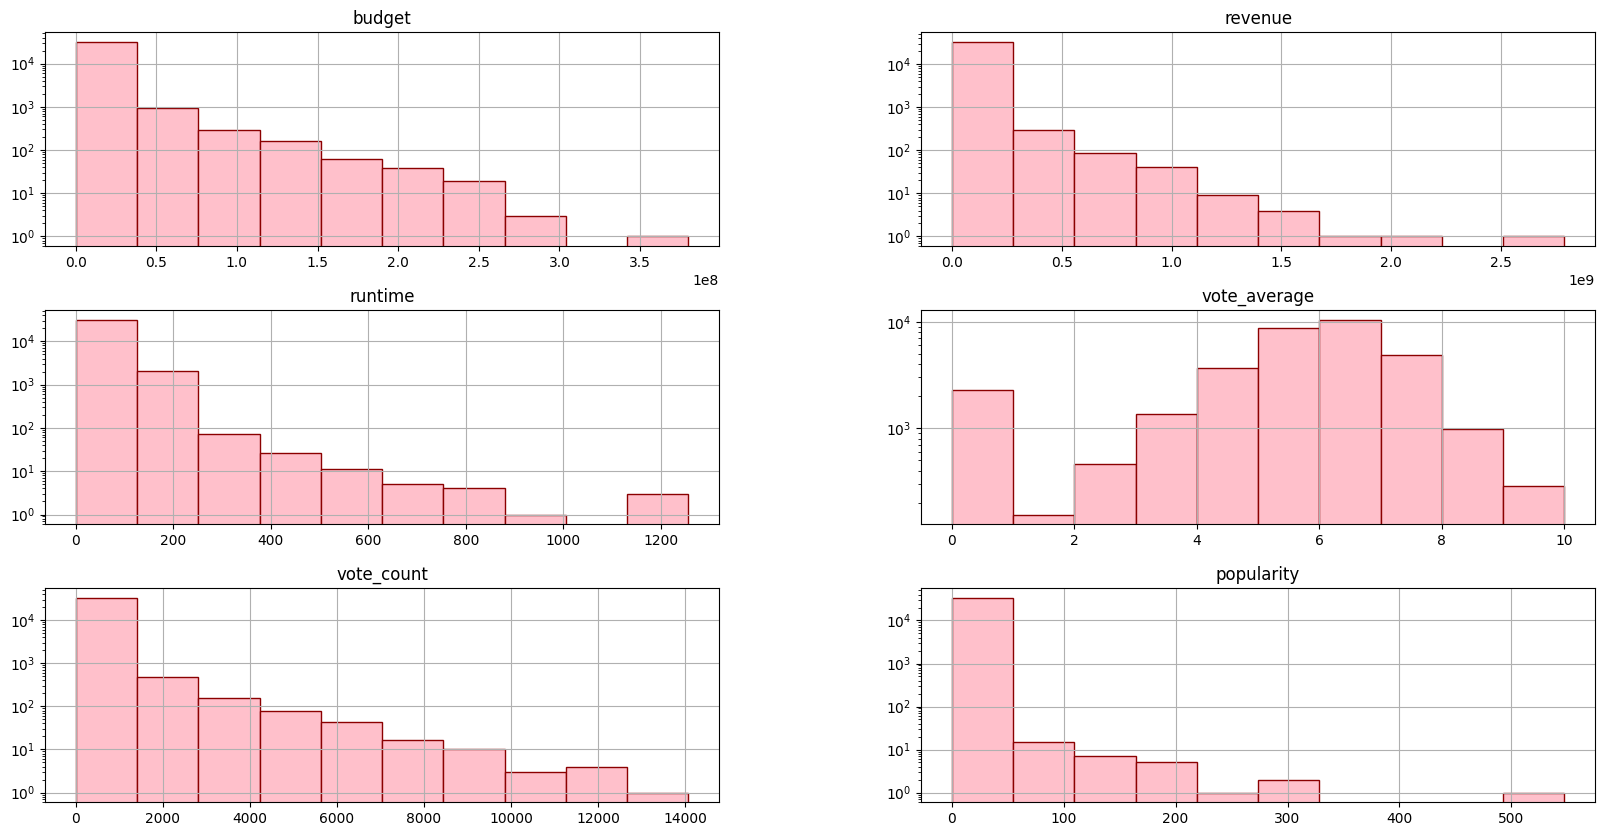

In [11]:
# Al observar el sesgo en los histogramas anteriores decido hacerlos de nuevo con una escala logaritmica para una mejor visualizacion.
dataframe_unido[['budget', 'revenue', 'runtime', 'vote_average', 'vote_count','popularity']].hist(
    figsize=(20, 10), 
    log=True, 
    color='pink', 
    edgecolor='darkred'
)

plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

* Se pueden observar mejor los sesgos y tambien el hecho de que algunas columnas poseen outliers a verificar

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 4. Verificacion de los outliers segun la distribucion

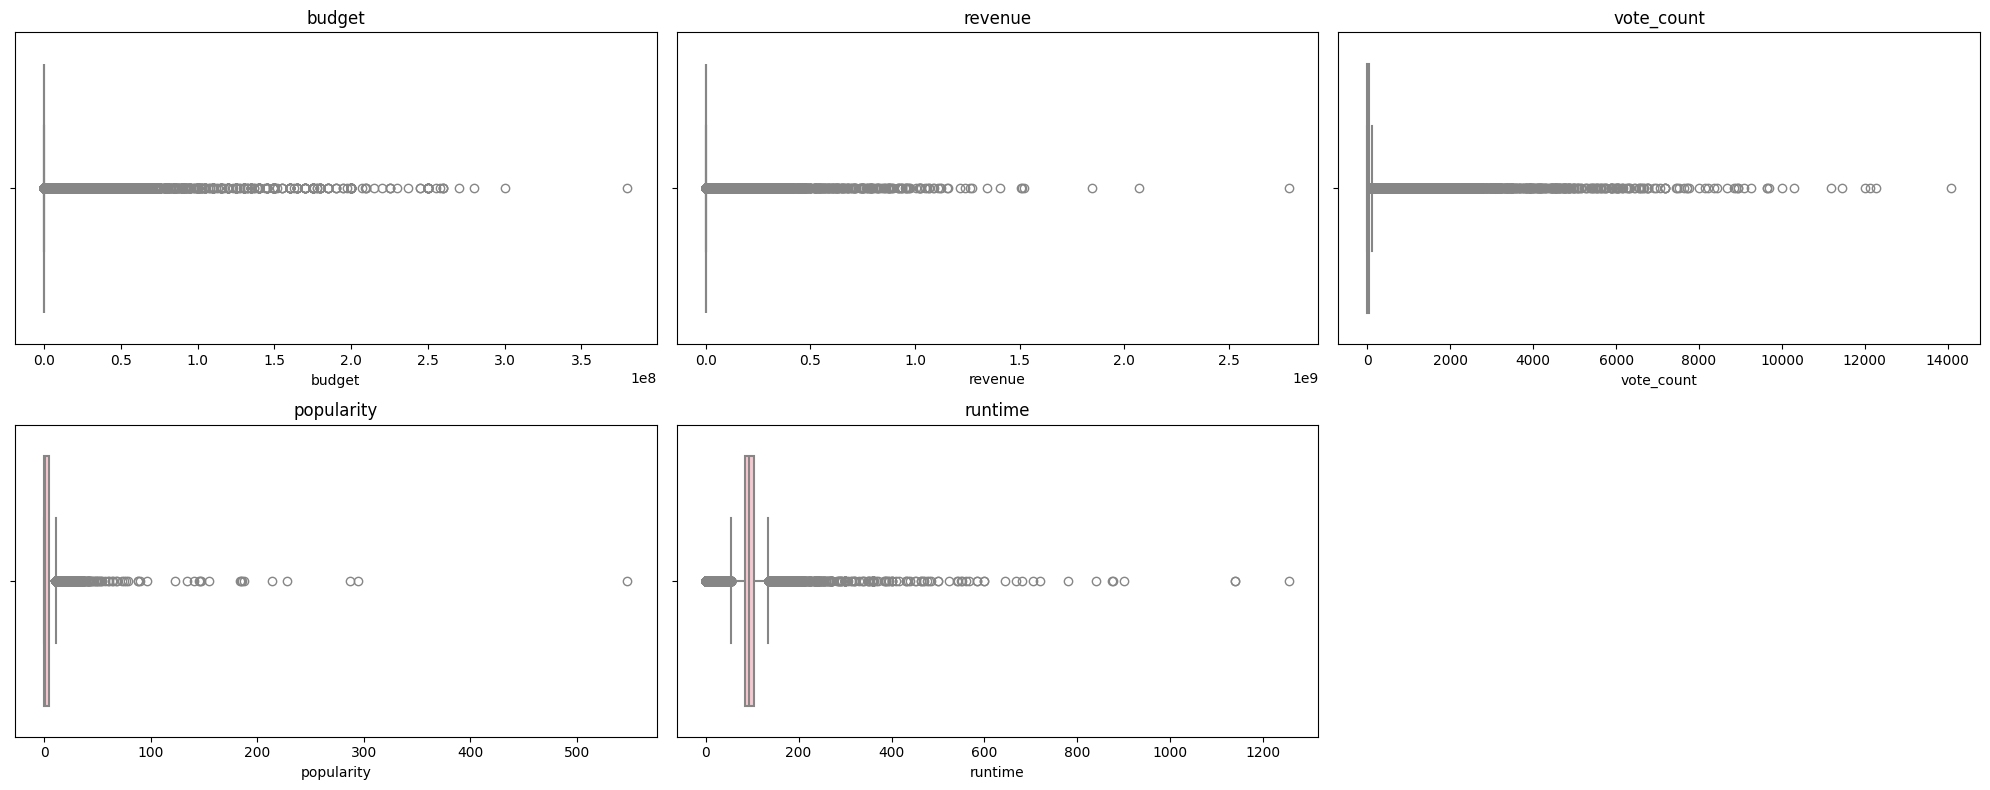

In [12]:
# Especifico las columnas a verificar los outliers
columnas_a_verificar = ['budget', 'revenue', 'vote_count' , 'popularity', 'runtime']

# Creo subplots para mostrar varios boxplots al mismo tiempo
plt.figure(figsize=(20, 8))

# Creo un boxplot para cada columna especificada
for i, column in enumerate(columnas_a_verificar, 1):
    plt.subplot(2, 3, i)  # Ajusto el numero de filas y columnas (2 filas y 3 columnas)
    sns.boxplot(x=dataframe_unido[column], color='pink', linewidth=1.5)
    plt.title(column)

plt.tight_layout()  # Esta linea asegura que los graficos no se superpongan
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Analisis de los outliers:

* Budget (Presupuesto):

El boxplot muestra una gran cantidad de valores atípicos (outliers) en el extremo superior.
La mayoría de las películas tienen presupuestos relativamente bajos, pero hay algunas con presupuestos extremadamente altos que están marcadas como puntos fuera del rango.
El valor máximo parece estar alrededor de 3.5e8 (350 millones de dólares). 

* Revenue (Ganancia):

Similar al presupuesto, los ingresos muestran un patrón con muchos valores atípicos. Las películas que tienen ingresos extremadamente altos también están fuera del rango de los ingresos típicos.
La mayor parte de las películas no generan tanto dinero, pero algunas películas han generado ingresos de hasta 2.5e9 (2.5 mil millones de dólares).

* Vote Count (Número de votos):

El número de votos presenta una distribución bastante sesgada, donde la mayoría de las películas tienen un número de votos relativamente bajo.
Los outliers también están presentes, lo que indica que hay películas que han recibido un número significativamente mayor de votos que otras (algunas hasta 14,000 votos).

* Runtime (Duración):

Aquí podemos ver que la duración de la mayoría de las películas se concentra en un rango típico entre 90 y 120 minutos.
Los valores atípicos (outliers) incluyen películas con una duración superior a 300 minutos, como mencionaste antes con el ejemplo de Napoleón.
Se confirma que las películas de más de 332 minutos son outliers y deberían ser miniseries o casos especiales.

* Popularity (Popularidad):

La mayoría de las películas tienen una popularidad muy baja, con valores cercanos a cero.
Sin embargo, hay algunas películas que tienen una popularidad extremadamente alta, con un valor máximo cercano a 500.
Esto indica una variabilidad significativa en los niveles de popularidad entre las películas.

* Conclusión:

Todos los gráficos muestran que los datos tienen muchos outliers, especialmente en columnas como budget, revenue, vote_count, y popularity. Los valores extremos podrían sesgar los análisis si no se manejan adecuadamente. En el caso de la columna runtime, como ya identificaste, es importante considerar eliminar o tratar las películas de larga duración como posibles outliers (miniseries o versiones extendidas).

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [13]:
# Ordeno el DataFrame por el presupuesto en orden descendente
top_budgets_df = dataframe_unido.sort_values(by='budget', ascending=False)

# Selecciono las 10 primeras filas
top_10_budgets_df = top_budgets_df.head(10)

# Obtengo los titulos de las 10 peliculas con el presupuesto mas alto
top_10_titles = top_10_budgets_df['title'].tolist()

print(top_10_titles)

['Pirates of the Caribbean: On Stranger Tides', "Pirates of the Caribbean: At World's End", 'Avengers: Age of Ultron', 'Superman Returns', 'John Carter', 'Transformers: The Last Knight', 'Tangled', 'Spider-Man 3', 'The Lone Ranger', 'Harry Potter and the Half-Blood Prince']


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

* Conclusión sobre los Outliers de la columna budget (Presupuesto)

Aunque los outliers en el presupuesto introducen un sesgo, se mantendrán en el análisis porque representan películas exitosas como Avengers, Pirates of the Caribbean, Spiderman, entre otras. Estos datos son cruciales para entender el impacto del presupuesto en el éxito y la industria cinematográfica en general.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [14]:
# Ordeno el DataFrame por la ganancia en orden descendente
top_Revenue_df = dataframe_unido.sort_values(by='revenue', ascending=False)

# Selecciono las 10 primeras filas
top_10_revenues_df = top_Revenue_df.head(10)

# Obtengo los titulos de las 10 peliculas con las ganancias mas altas
top_10_titles = top_10_revenues_df['title'].tolist()

print(top_10_titles)

['Avatar', 'Star Wars: The Force Awakens', 'Titanic', 'The Avengers', 'Jurassic World', 'Furious 7', 'Avengers: Age of Ultron', 'Harry Potter and the Deathly Hallows: Part 2', 'Frozen', 'Beauty and the Beast']


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

* Conclusión sobre los Outliers de la columna revenue (Ganancia)

Aunque los outliers en las Ganancias introducen un sesgo, se mantendrán en el análisis porque representan películas exitosas como Avatar, Star wars, Titanic, entre otras. Estos datos son fundamentales para comprender el impacto de los ingresos en el éxito y la influencia de las grandes producciones en la industria cinematográfica.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [15]:
# Ordeno el DataFrame por el conteo de votaciones en orden descendente
top_vote_count_df = dataframe_unido.sort_values(by='vote_count', ascending=False)

# Seleccionn las 10 primeras filas
top_10_vote_count_df = top_vote_count_df.head(10)

# Obtengo los titulos de las 10 peliculas con la cantidad de votaciones mas alta
top_10_titles = top_10_vote_count_df['title'].tolist()

print(top_10_titles)

['Inception', 'The Dark Knight', 'Avatar', 'The Avengers', 'Deadpool', 'Interstellar', 'Django Unchained', 'Guardians of the Galaxy', 'Fight Club', 'The Hunger Games']


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

* Conclusión sobre los Outliers en Conteo de Votos

Aunque los outliers en el conteo de votos introducen un sesgo, se mantendrán en el análisis porque representan películas con gran popularidad y recepción crítica, como Inception y The Dark Knight. Estos datos son esenciales para entender cómo el conteo de votos refleja el interés y la percepción del público sobre las películas.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [16]:
# Ordeno el DataFrame por la popularidad en orden descendente
top_vote_count_df = dataframe_unido.sort_values(by='popularity', ascending=False)

# Selecciono las 10 primeras filas
top_10_vote_count_df = top_vote_count_df.head(10)

# Obtengo los titulos de las 10 peliculas con la popularidad mas alta
top_10_titles = top_10_vote_count_df['title'].tolist()

print(top_10_titles)

['Minions', 'Wonder Woman', 'Beauty and the Beast', 'Baby Driver', 'Big Hero 6', 'Deadpool', 'Guardians of the Galaxy Vol. 2', 'Avatar', 'John Wick', 'Gone Girl']


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

* Conclusión sobre los Outliers en Popularidad

Aunque los outliers en popularidad pueden introducir un sesgo, se mantendrán en el análisis porque incluyen películas de alto perfil y gran impacto, como Minions y Wonder Woman. Estos datos son cruciales para comprender cómo la popularidad se distribuye entre las películas y su influencia en la percepción del público.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [17]:
# Ordeno el DataFrame por la duracion en orden descendente
top_runtime_df = dataframe_unido.sort_values(by='runtime', ascending=False)

# Seleccionar las 10 primeras filas
top_10_runtime_df = top_runtime_df.head(10)

# Obtener los titulos de las 10 peliculas con la duracion en minutos mas alta
top_10_titles = top_10_runtime_df['title'].tolist()

print(top_10_titles)

['Centennial', 'Jazz', 'Baseball', 'The Story of Film: An Odyssey', 'Taken', 'The War', 'The Roosevelts: An Intimate History', 'Hollywood', 'From the Earth to the Moon', 'Band of Brothers']


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

* Al revisar los datos que crean un sesgo en la columna runtime descubro que los valores mayores a 330 son miniseries por lo tanto decido eliminarlas para quitar el sesgo extremo

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [18]:
# Filtro las peliculas con una duración menor o igual a 330 minutos
dataframe_unido = dataframe_unido[dataframe_unido['runtime'] <= 330]

# Verifico que el filtro se haya aplicado correctamente
print(dataframe_unido['runtime'].max())

330.0


In [19]:
# Ordeno de nuevo el DataFrame por la duracion en orden descendente
top_runtime_df = dataframe_unido.sort_values(by='runtime', ascending=False)

# Seleccionar las 10 primeras filas
top_10_runtime_df = top_runtime_df.head(10)

# Obtengo nuevamente los títulos de las 10 películas con la duracion mas alta
top_10_titles = top_10_runtime_df['title'].tolist()

print(top_10_titles)

['Prohibition', 'Sleep', 'Tinker Tailor Soldier Spy', 'The Far Pavilions', 'Great Migrations', 'If Tomorrow Comes', 'The Miracle Rider', 'Streets of Laredo', 'Planet Earth II', 'Judex']


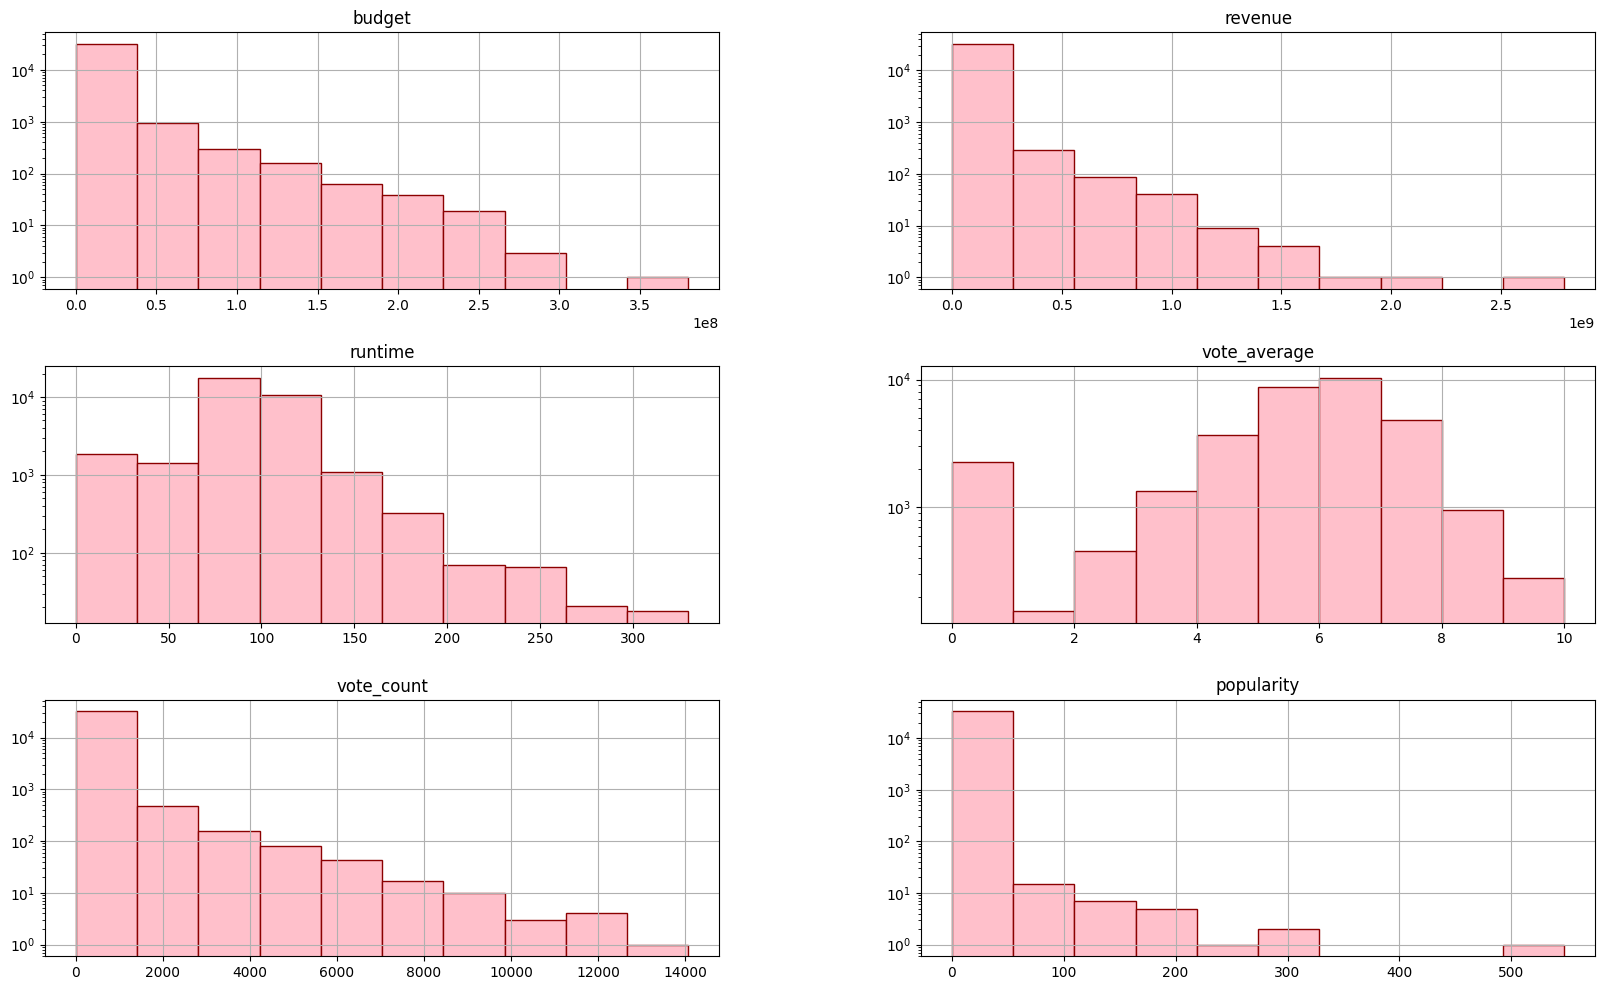

In [20]:
# Verifico el arreglo del sesgo extremo en la columna runtime y grafico los histogramas nuevamente
dataframe_unido[['budget', 'revenue', 'runtime', 'vote_average', 'vote_count','popularity']].hist(
    figsize=(20, 12), 
    log=True, 
    color='pink', 
    edgecolor='darkred'
)

plt.show()

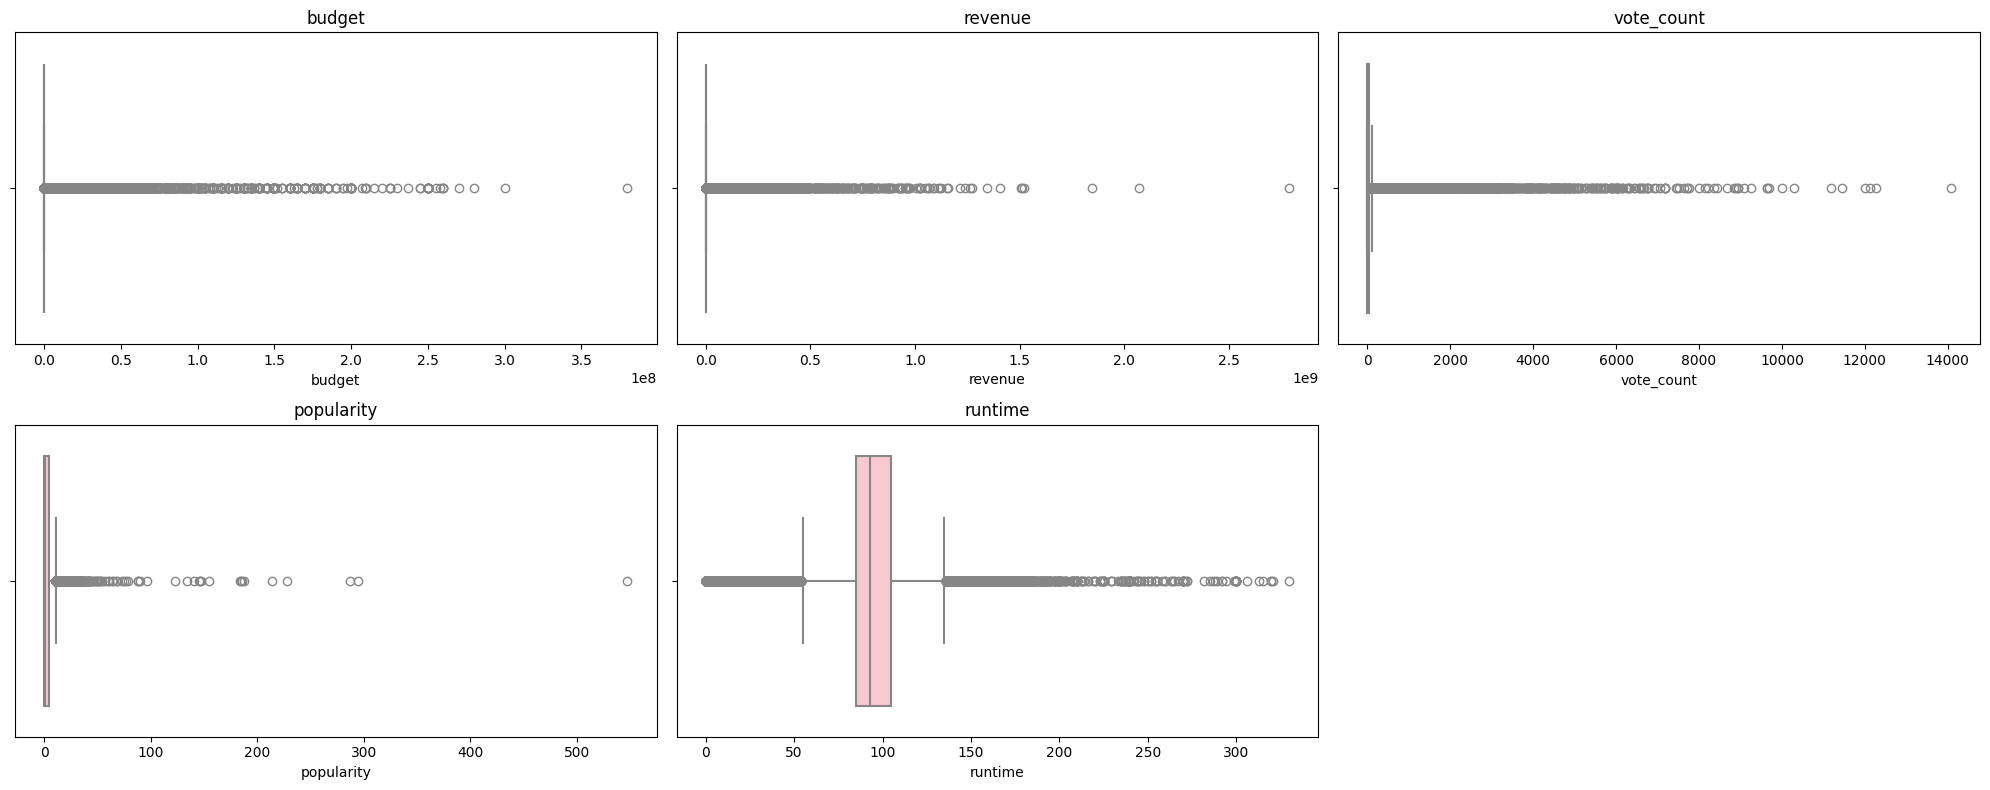

In [21]:
# Verifico los sesgos corregidos
columnas_a_verificar = ['budget', 'revenue', 'vote_count', 'popularity','runtime']

# Creo subplots para mostrar varios boxplots al tiempo
plt.figure(figsize=(20, 8))

# Creo un boxplot para cada columna a verificar
for i, column in enumerate(columnas_a_verificar, 1):
    plt.subplot(2, 3, i)   # Se ajusta el numero de filas y columnas (2 filas y 3 columnas)
    sns.boxplot(x=dataframe_unido[column], color='pink', linewidth=1.5)
    plt.title(column)

plt.tight_layout()  # Esta linea es para asegurarme que los graficos no se superpongan
plt.show()

### 5. Distribuicion de variables numericas del genero de un miembro de produccion o actor

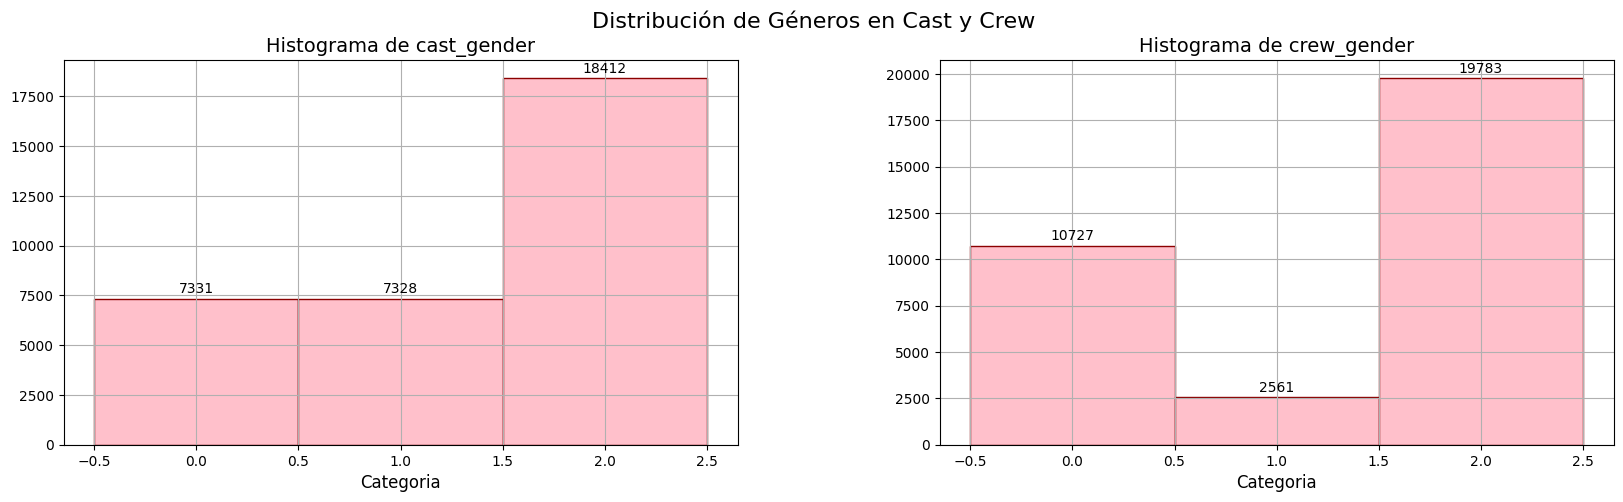

In [22]:
# Creo histogramas para las variables numéricas del genero tanto de los actores como del equipo de creditos
histogramas = dataframe_unido[['cast_gender', 'crew_gender']].hist(
    bins=[-0.5, 0.5, 1.5, 2.5],  # Defino los intervalos para 0, 1 y 2
    figsize=(20, 5),
    color='pink',
    edgecolor='darkred'
)

# Creo etiquetas para cada histograma para obtener una mejor visualizacion
for ax, column in zip(histogramas.flatten(), ['cast_gender', 'crew_gender']):
    ax.set_title(f'Histograma de {column}', fontsize=14)
    ax.set_xlabel('Categoria', fontsize=12)
    ax.set_ylabel('', fontsize=12)
    
    # Agrego etiquetas numericas a las barras
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', fontsize=10, color='black', padding=2)

# Añado el titulo general para los histogramas
plt.suptitle('Distribución de Géneros en Cast y Crew', fontsize=16)

plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Analisis de cada histograma:

* cast_gender (genero de los actores):

Eje X:
    0: Genero no especificado.
    1: Mujeres.
    2: Hombres.

Eje Y: Representa el conteo de cuántos registros caen en cada categoria de género.

Observación:    
    Se observa que hay muchos mas registros donde el género es hombre (2), y los grupos de mujer (1) y genero no especificado (0) compartes valores muy similares.

* crew_gender (genero de la produccion):

Eje X:
    0: Genero no especificado.
    1: Mujeres.
    2: Hombres.

Eje Y: Representa el conteo de cuántos registros caen en cada categoria de género.

Observacion: 
    Se observa que hay mas registros donde el género es hombre (2), el siguiente grupo mas grande corresponde a genero no especificado (0), seguido de un numero muy bajo de mujeres (1).

conclusion: los graficos muestran que hay mas hombres que mujeres tanto en el reparto como en el equipo de produccion, y muchos registros no tienen un genero especificado. Esto podría indicar una falta de datos completos o un sesgo en la informacion registrada sobre el genero.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 6. Verificacion de los outliers para credits_df_parquet_EDA

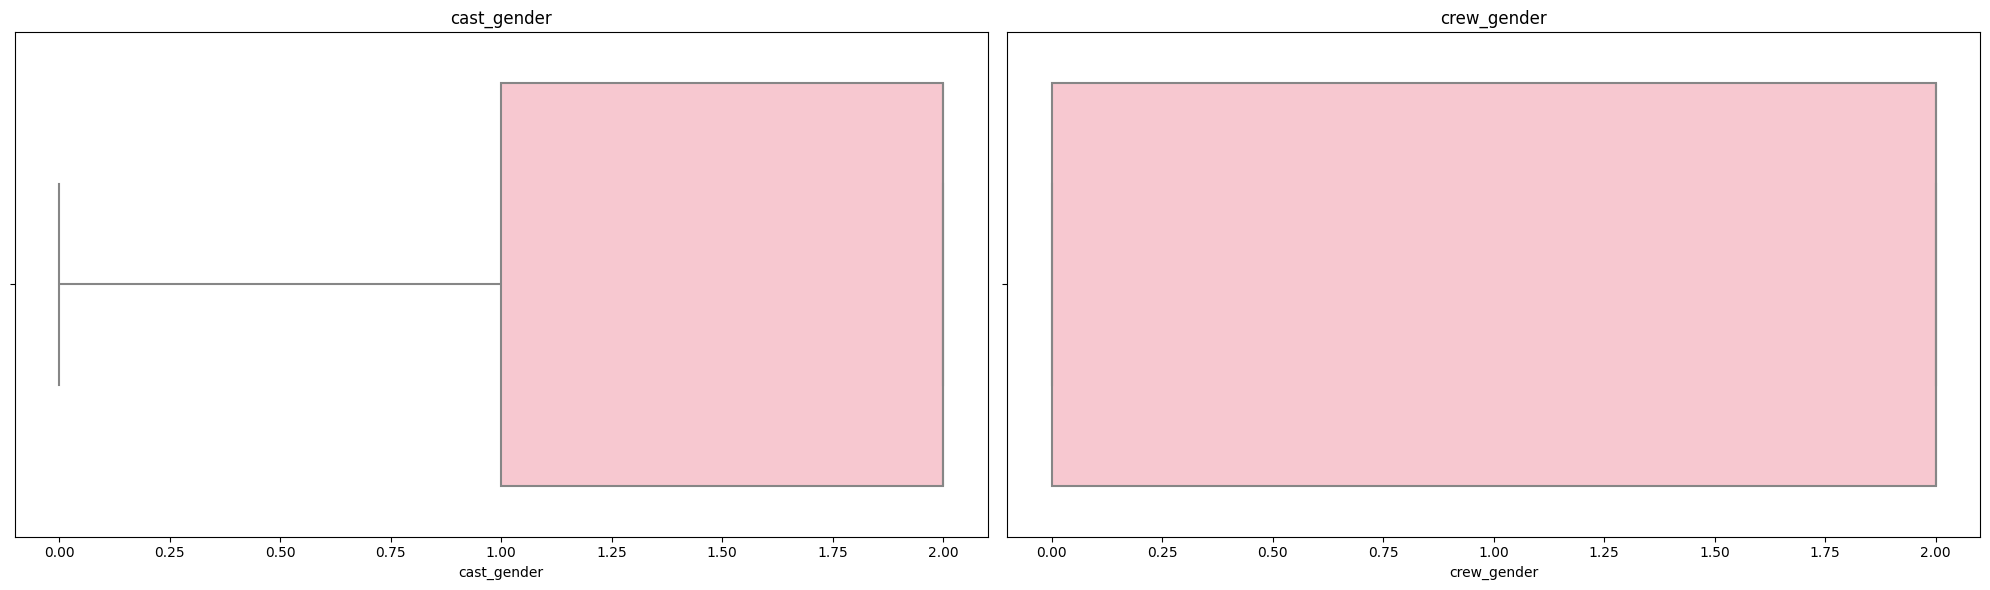

In [23]:
# A pesar de que no se ven outliers en los histogramas se realiza una verificar mas especifica

# Especifico las columnas que quiero verificar
columns_a_verificar = ['cast_gender', 'crew_gender']

# Creo subplots para mostrar varios boxplots al mismo tiempo
plt.figure(figsize=(20, 6))  # Ajusto el tamaño de la figura

# Creo un boxplot para cada columna a verificar
for i, column in enumerate(columns_a_verificar, 1):
    plt.subplot(1, 2, i)  # Ajusto el número de filas y columnas (1 fila y 2 columnas)
    sns.boxplot(x=dataframe_unido[column], color='pink', linewidth=1.5)
    plt.title(column)

plt.tight_layout()  # Aseguro que los graficos no se superpongan
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Analisis de los outliers:

cast_gender:
El boxplot muestra una caja que abarca la mayoría de los datos, indicando que la mayoría de los valores se encuentran entre 0 y 2.
No se observan outliers, lo que sugiere que no hay valores atípicos significativos en esta categoría.

crew_gender:
Similar al anterior, el boxplot de crew_gender también muestra una caja que abarca el rango de 0 a 2.
Al igual que en el caso anterior, no se observan outliers, lo que indica que los datos son homogéneos y no presentan valores extremos.

Interpretación General:
La ausencia de outliers en ambos boxplots sugiere que la distribución de los géneros en el elenco y el equipo de producción es bastante uniforme.
Los valores en ambas columnas parecen estar bien distribuidos, lo que puede indicar una representación equilibrada de géneros en el conjunto de datos.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 7. Analizar la Influencia de Actores y Miembros del Equipo

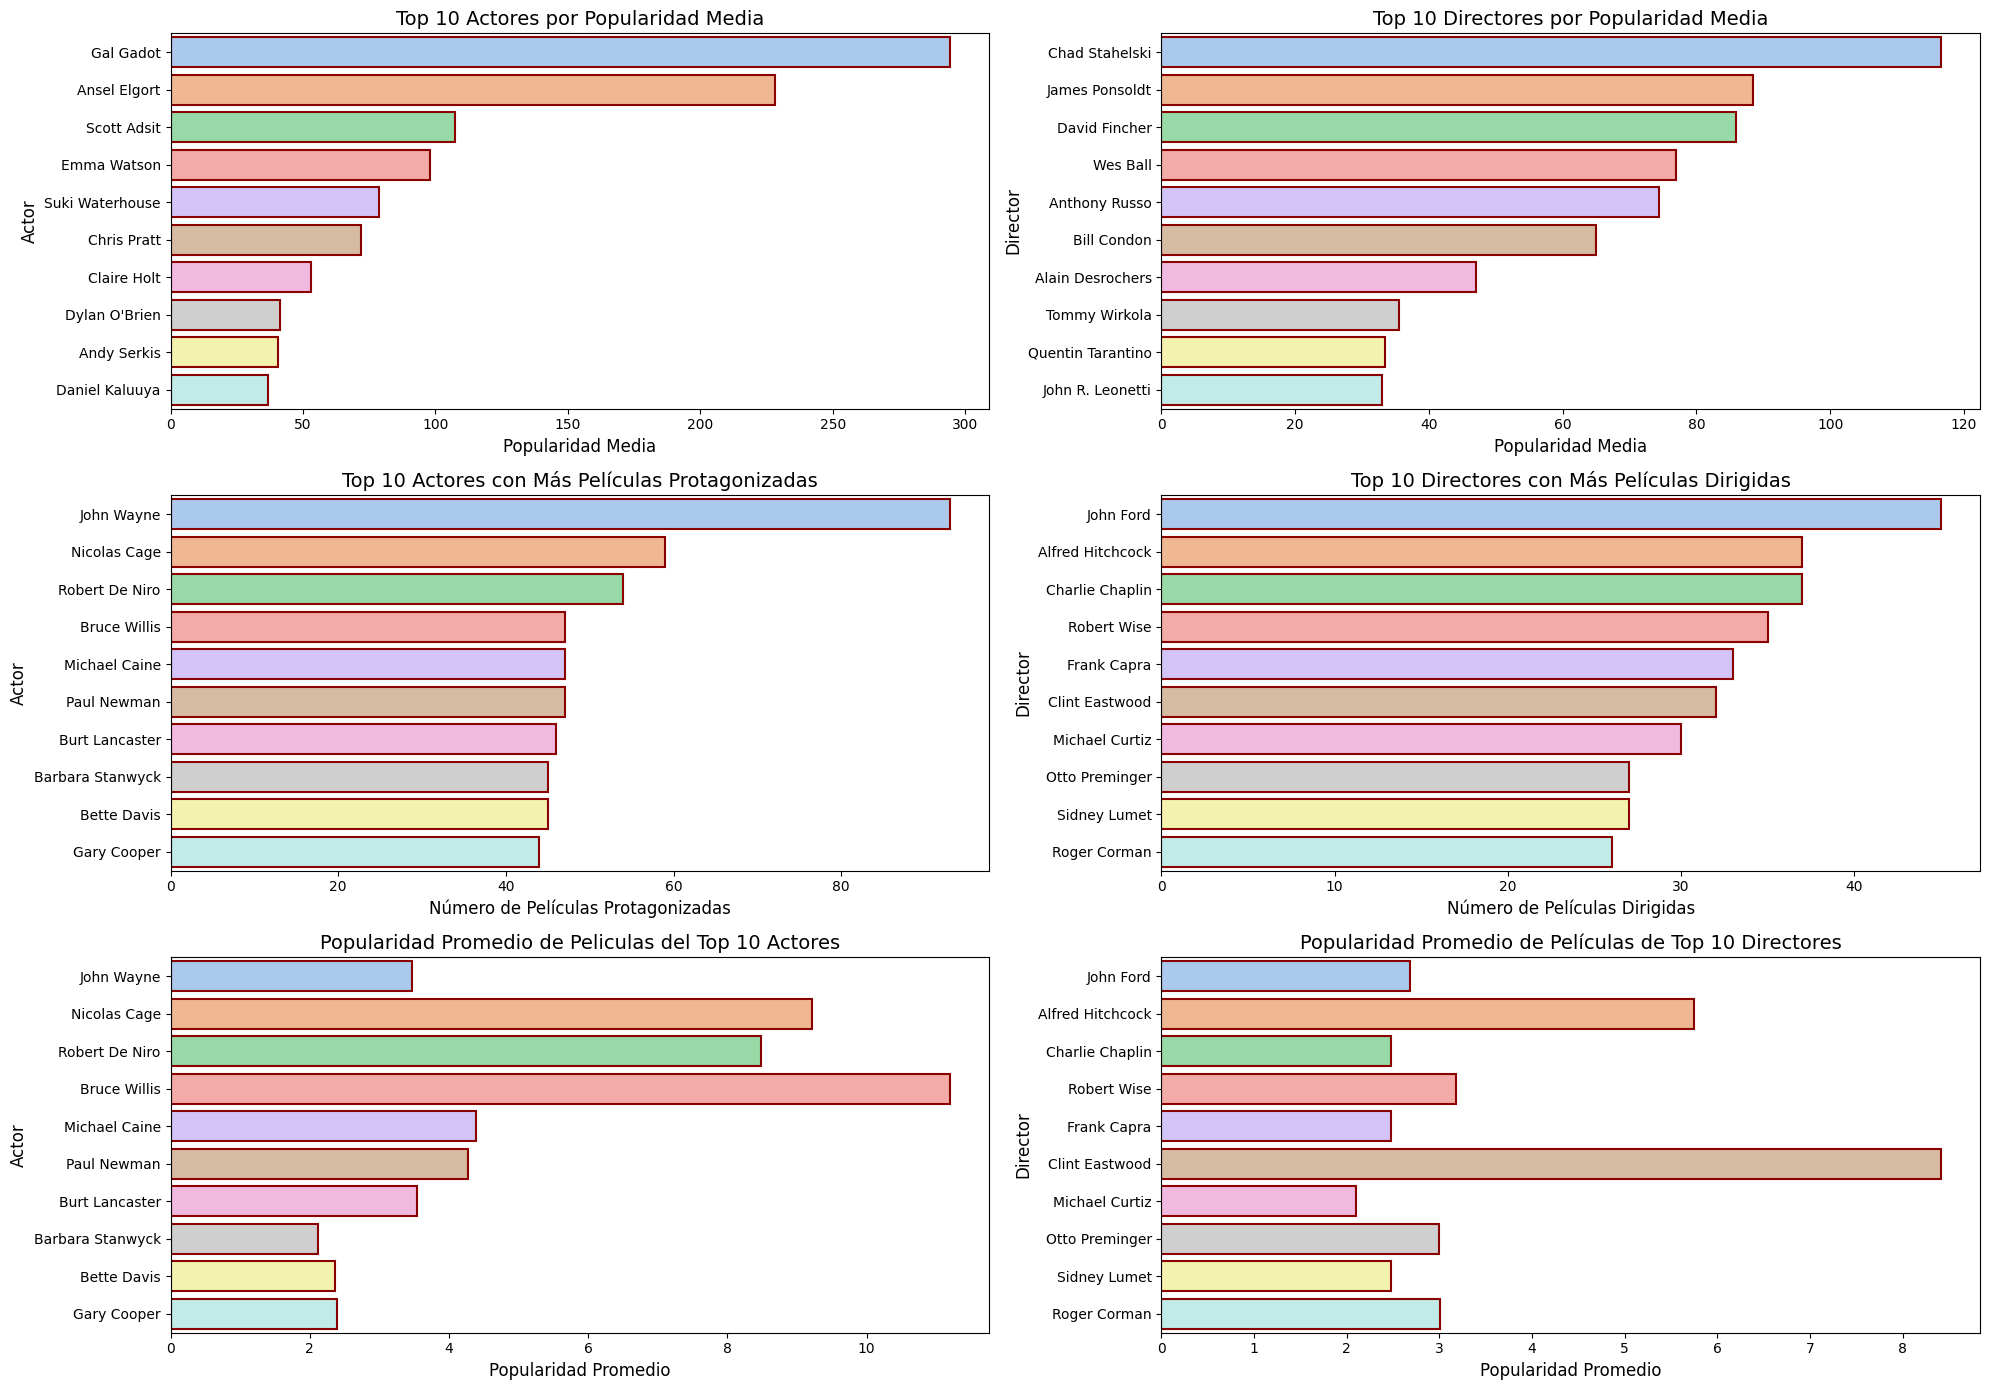

In [24]:
# Creo una paleta pastel
pastel_palette = 'pastel'

# Agrupo por nombre de actor y calculo las estadisticas de popularidad
actor_popularity = dataframe_unido.groupby('cast_name_actor')['popularity'].mean().sort_values(ascending=False).head(10)

# Filtro para obtener solo los miembros del equipo cuyo rol sea "Director"
directors_df = dataframe_unido[dataframe_unido['crew_job'] == 'Director']

# Agrupo por nombre del director y calculo la popularidad media
director_popularity = directors_df.groupby('crew_name_member')['popularity'].mean().sort_values(ascending=False).head(10)

# Calculo los 10 de Directores con Mas Peliculas Dirigidas
director_count = directors_df['crew_name_member'].value_counts().head(10).index
director_top10 = directors_df[directors_df['crew_name_member'].isin(director_count)]

# Agrupo por nombre del director y calculo la cantidad de peliculas y la popularidad media
director_top10_popularity = director_top10.groupby('crew_name_member').agg({
    'popularity': 'mean',
    'crew_name_member': 'count'
}).rename(columns={'crew_name_member': 'number_of_movies'}).sort_values(by='number_of_movies', ascending=False).head(10)

# Calculo el Top 10 de Actores con Mas Películas Protagonizadas
actors_count = dataframe_unido['cast_name_actor'].value_counts().head(10).index
actors_top10 = dataframe_unido[dataframe_unido['cast_name_actor'].isin(actors_count)]

# Agrupo por nombre de actor y calculo la cantidad de peliculas y la popularidad media
actor_top10_popularity = actors_top10.groupby('cast_name_actor').agg({
    'popularity': 'mean',
    'cast_name_actor': 'count'
}).rename(columns={'cast_name_actor': 'number_of_movies'}).sort_values(by='number_of_movies', ascending=False).head(10)

# Configuro el tamaño de los gráficos
plt.figure(figsize=(20, 14))

# Columna 1 - Fila 1: Top 10 Actores por Popularidad Media
plt.subplot(3, 2, 1)
sns.barplot(x=actor_popularity.values, y=actor_popularity.index, 
            palette=pastel_palette, hue=actor_popularity.index, legend=False)
for bar in plt.gca().patches:
    bar.set_edgecolor('#8B0000')
    bar.set_linewidth(1.5)
plt.title('Top 10 Actores por Popularidad Media', fontsize=14)
plt.xlabel('Popularidad Media', fontsize=12)
plt.ylabel('Actor', fontsize=12)

# Columna 1 - Fila 2: Top 10 Actores con Mas Películas Protagonizadas
plt.subplot(3, 2, 3)
sns.barplot(x=actor_top10_popularity['number_of_movies'], y=actor_top10_popularity.index, 
            palette=pastel_palette, hue=actor_top10_popularity.index, legend=False)
for bar in plt.gca().patches:
    bar.set_edgecolor('#8B0000')
    bar.set_linewidth(1.5)
plt.title('Top 10 Actores con Más Películas Protagonizadas', fontsize=14)
plt.xlabel('Número de Películas Protagonizadas', fontsize=12)
plt.ylabel('Actor', fontsize=12)

# Columna 1 - Fila 3: Popularidad Promedio de Películas de Top 10 Actores con Más Peliulas protagonizadas
plt.subplot(3, 2, 5)
sns.barplot(x=actor_top10_popularity['popularity'], y=actor_top10_popularity.index, 
            palette=pastel_palette, hue=actor_top10_popularity.index, legend=False)
for bar in plt.gca().patches:
    bar.set_edgecolor('#8B0000')
    bar.set_linewidth(1.5)
plt.title('Popularidad Promedio de Peliculas del Top 10 Actores', fontsize=14)
plt.xlabel('Popularidad Promedio', fontsize=12)
plt.ylabel('Actor', fontsize=12)

# Columna 2 - Fila 1: Top 10 Directores por Popularidad Media
plt.subplot(3, 2, 2)
sns.barplot(x=director_popularity.values, y=director_popularity.index, 
            palette=pastel_palette, hue=director_popularity.index, legend=False)
for bar in plt.gca().patches:
    bar.set_edgecolor('#8B0000')
    bar.set_linewidth(1.5)
plt.title('Top 10 Directores por Popularidad Media', fontsize=14)
plt.xlabel('Popularidad Media', fontsize=12)
plt.ylabel('Director', fontsize=12)

# Columna 2 - Fila 2: Top 10 Directores con Mas Peliculas Dirigidas
plt.subplot(3, 2, 4)
sns.barplot(x=director_top10_popularity['number_of_movies'], y=director_top10_popularity.index, 
            palette=pastel_palette, hue=director_top10_popularity.index, legend=False)
for bar in plt.gca().patches:
    bar.set_edgecolor('#8B0000')
    bar.set_linewidth(1.5)
plt.title('Top 10 Directores con Más Películas Dirigidas', fontsize=14)
plt.xlabel('Número de Películas Dirigidas', fontsize=12)
plt.ylabel('Director', fontsize=12)

# Columna 2 - Fila 3: Popularidad Promedio de Peliculas del Top 10 Directores con Mas Películas Dirigidas
plt.subplot(3, 2, 6)
sns.barplot(x=director_top10_popularity['popularity'], y=director_top10_popularity.index, 
            palette=pastel_palette, hue=director_top10_popularity.index, legend=False)
for bar in plt.gca().patches:
    bar.set_edgecolor('#8B0000')
    bar.set_linewidth(1.5)
plt.title('Popularidad Promedio de Películas de Top 10 Directores', fontsize=14)
plt.xlabel('Popularidad Promedio', fontsize=12)
plt.ylabel('Director', fontsize=12)

# aseguro que los graficos no se superpongan
plt.tight_layout()

# Muestro los graficos
plt.show()

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Analisis


* Directores y Popularidad:
Los directores que hacen muchas películas no siempre tienen las películas más populares. A veces, la popularidad de un director depende más de la calidad de sus películas que de la cantidad que hace.

* Directores Menos Activos:
Los directores que no hacen tantas películas pueden tener películas que son muy populares. Esto muestra que menos cantidad no siempre significa menos impacto.

* Actores y Popularidad:
Los actores que han hecho muchas películas no siempre son los más populares. Pero algunos actores con muchas películas aún tienen una alta popularidad, lo que indica que pueden mantener su estatus incluso después de muchos años en la industria.

* Actores y Éxitos:
Los actores con menos películas tambien pueden ser muy populares si las películas en las que están son grandes éxitos. Esto muestra que el éxito de una película puede aumentar la popularidad de un actor, sin importar cuánto tiempo lleve trabajando.


#### A tomar en cuenta para el modelo :
- No solo se debo considerar la cantidad de películas que un director o actor ha hecho. También es importante mirar cuán populares son sus películas.

- Al hacer las recomendaciones, hay que incluir tanto a los directores y actores con muchas películas como a aquellos que tienen una alta popularidad.

- debo enfócar el modelo en directores y actores que son muy populares para recomendar titulos con una buena calidad.
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 8. Distribucion de variables categoricas

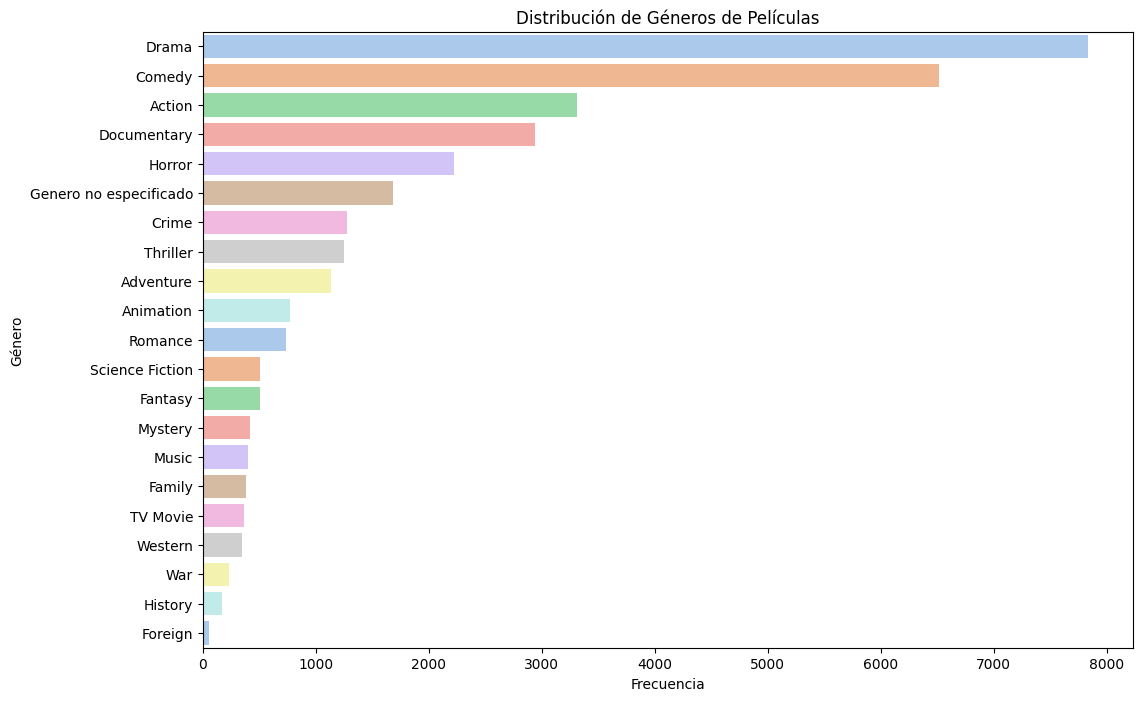

In [25]:
# Contar la frecuencia de cada género
genre_counts = dataframe_unido['name_genre'].value_counts()

# Crear un DataFrame para la visualización
df_genre_counts = pd.DataFrame({'Género': genre_counts.index, 'Frecuencia': genre_counts.values})
df_genre_counts['Color'] = df_genre_counts['Género']  # Añadir columna dummy para `hue`

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='Frecuencia', y='Género', data=df_genre_counts, hue='Color', palette='pastel', dodge=False)

# Añadir título y etiquetas
plt.title('Distribución de Géneros de Películas')
plt.xlabel('Frecuencia')
plt.ylabel('Género')

# Eliminar la leyenda
plt.legend([], [], frameon=False)

plt.show()

### 9. Relaciones entre Variables

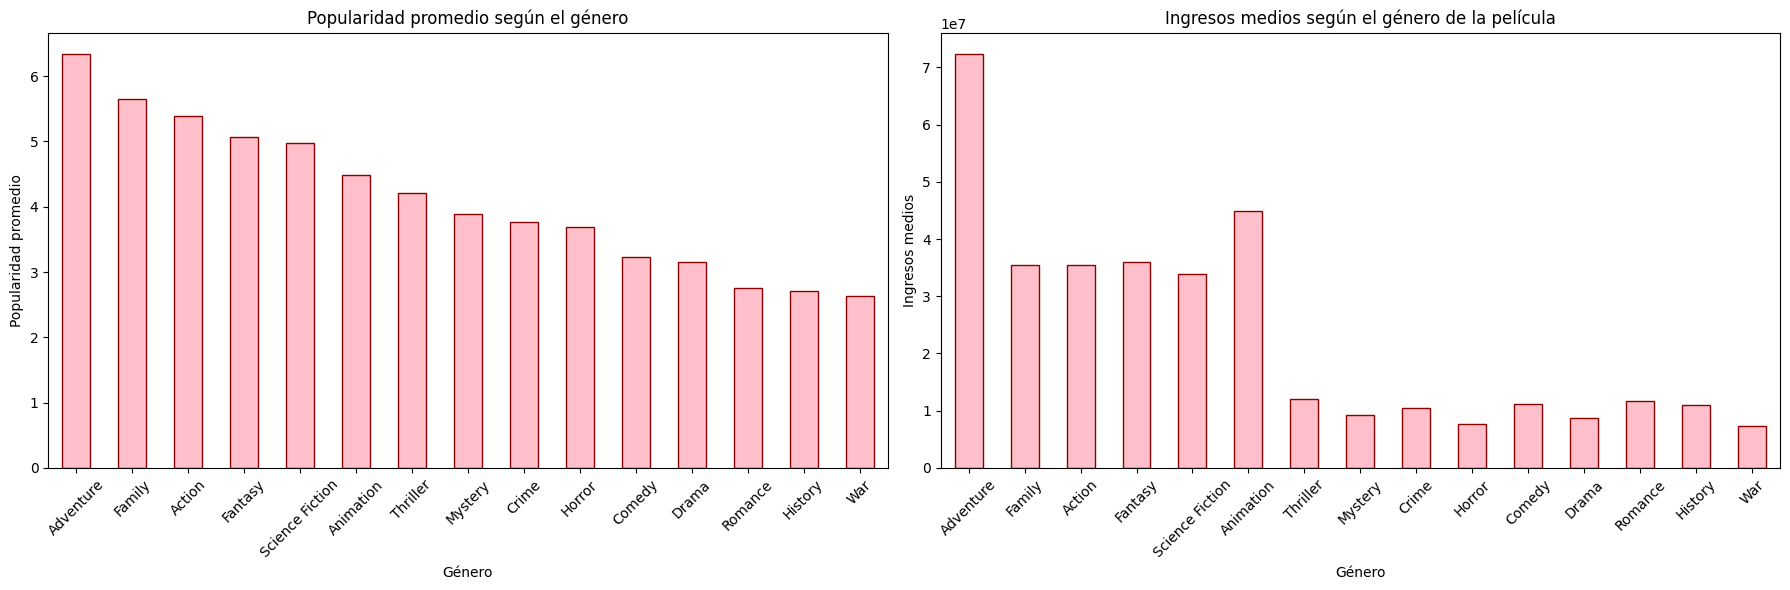

In [26]:
# Agrupo la popularidad por genero y selecciono los 15 generos mas importantes
top_15_genres = dataframe_unido.groupby('name_genre')['popularity'].mean().nlargest(15)

# Agrupo los ingresos medios por genero y selecciono los 15 generos mas importantes
top_15_revenue = dataframe_unido.groupby('name_genre')['revenue'].mean().loc[top_15_genres.index]

# Configuro el tamaño y la cantidad de los graficos
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # para verlos uno al lado del otro tomo 1 fila y 2 columnas

# Grafico la popularidad media por los 15 generos mas importantes en el primer subplot
top_15_genres.plot(kind='bar', color='pink', edgecolor='darkred', ax=axes[0])
axes[0].set_title('Popularidad promedio según el género')
axes[0].set_xlabel('Género')
axes[0].set_ylabel('Popularidad promedio')
axes[0].tick_params(axis='x', rotation=45)

# Grafico los ingresos medios por los 15 generos mas importantes en el segundo subplot
top_15_revenue.plot(kind='bar', color='pink', edgecolor='darkred', ax=axes[1])
axes[1].set_title('Ingresos medios según el género de la película')
axes[1].set_xlabel('Género')
axes[1].set_ylabel('Ingresos medios')
axes[1].tick_params(axis='x', rotation=45)

# Ajusto el espacio entre graficos asegurandome de que no se superpongan 
plt.tight_layout()

# Muestro
plt.show()

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### Analisis

Gráfico de popularidad segun el genero:

* Género Más Popular: 
Aventura es el género con la mayor popularidad promedio, seguido de Familia y Acción. Esto sugiere que estos géneros son los más apreciados por el público.

* Géneros Menos Populares: 
Guerra y Historia son los géneros con menor popularidad promedio, lo que podría indicar un menor interés del público en estos temas.

Gráfico de Ingresos Medios segun el genero:

* Género con Más Ingresos: 
Nuevamente, Aventura lidera en ingresos medios, lo que indica que no solo es popular, sino que también genera más ingresos en taquilla.
    
* Géneros con Menos Ingresos: 
Al igual que en la popularidad, Guerra y Historia tienen los ingresos más bajos, lo que puede reflejar una menor producción o un menor interés del público.
    
Conclusiones:
* Estos gráficos son útiles para entender la importancia de incluir el genero en el modelo de recomendacion de peliculas

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

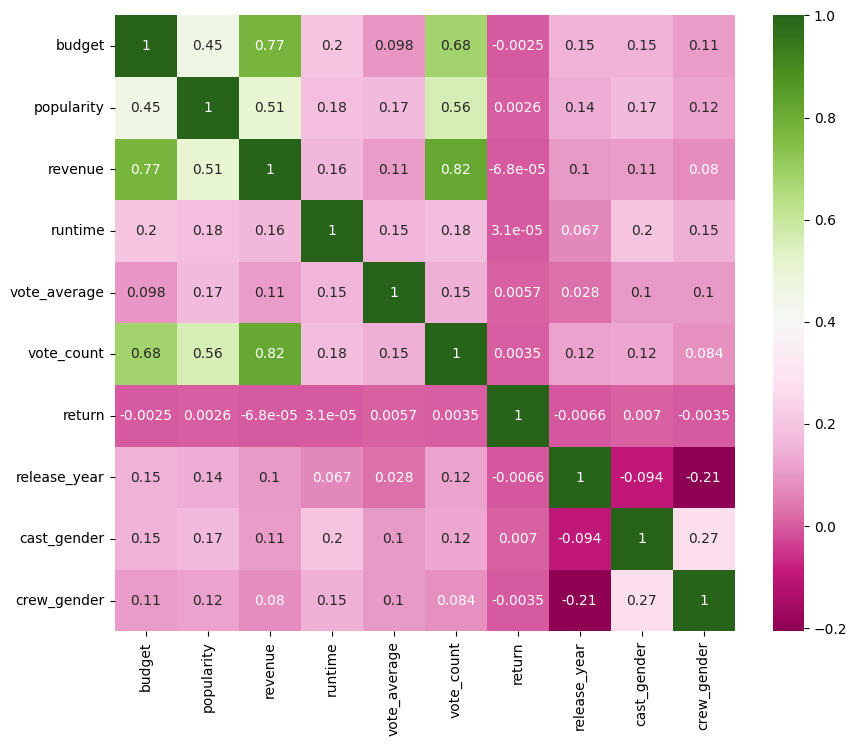

In [27]:
# Ajusto el tamaño del grafico
plt.figure(figsize=(10, 8))

# Calculo la matriz de correlación entre variables numericas
matriz_de_correlacion = dataframe_unido[['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'return', 'release_year','cast_gender','crew_gender']].corr()

# Creo el mapa de calor
sns.heatmap(matriz_de_correlacion, annot=True, cmap='PiYG')

# Muestro el grafico
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Analisis

Correlaciones fuertes:

* budget y revenue (0.77): Hay una fuerte correlación positiva (0.77) entre el budget y el revenue, lo que sugiere que a mayor presupuesto, mayores son los ingresos generados. mas ingresos.
* revenue y vote_count (0.82): Las peliculas con mayores ingresos tambien suelen tener mas votos. Es logico, ya que las peliculas más populares tienden a recibir más atencion y votos.
* budget y vote_count (0.68): También hay una fuerte correlacion entre el presupuesto y la cantidad de votos.

Correlaciones moderadas:
* popularity con vote_count (0.56) y vote_average (0.51): indicando que las películas más populares tienden a recibir más votos y mejores calificaciones.
* popularity con budget (0.45) y con revenue (0.51): La popularidad tiene una relación moderada con el presupuesto y los ingresos, lo que tiene sentido ya que películas con mayores recursos suelen ser más populares.
* popularity con vote_average (0.51):

Poca o nula correlación: 
* Las variables return, cast_gender, crew_gender, release_year no parecen estar correlacionadas con casi ninguna otra variable numerica.
* runtine: La duracion tiene una correlación baja con otras variables, lo que sugiere que la duración de la película no influye significativamente en la popularidad o los ingresos.
* Género del Elenco y del Equipo: Las correlaciones entre cast_gender y crew_gender (0.27) sugieren que hay una relación entre el género del elenco y el del equipo de producción, aunque no es muy fuerte.

Correlacion Negativa:
* Retorno de la Inversión: El return tiene una correlación negativa con el budget (-0.0025), lo que puede indicar que un mayor presupuesto no siempre se traduce en un mejor retorno de la inversión.

Conclusiones: 
* Usando este mapa de calor ayuda a tomar decisiones sobre las caracteristicas numericas que mas pueden influir dentro del modelo de recomendacion como las ganacias, la popularidad, la cantidad de votos.
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 10. Analisis de texto

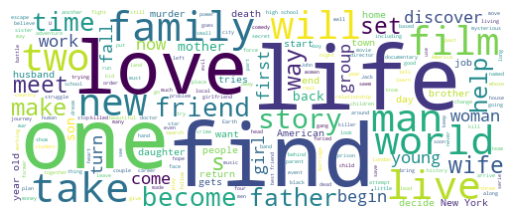

In [28]:
# Creo una nube de palabras para 'overview'

text = ' '.join(dataframe_unido['overview'].dropna())
wordcloud = WordCloud(width=500, height=200, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Analisis

Palabras Destacadas:
* Las palabras más grandes, como "find", "love", "life", y "one", indican que son las más comunes en las descripciones. Esto sugiere que los temas de amor, búsqueda y experiencias de vida son recurrentes en las historias de las películas.

Temas Comunes:
* La presencia de palabras como "family", "friend", y "woman" sugiere que las relaciones interpersonales y la dinámica familiar son temas importantes en las narrativas.

Variedad de Términos:
* La nube incluye una mezcla de sustantivos, verbos y adjetivos, lo que refleja la diversidad de las historias contadas en las películas. Palabras como "discover", "decide", y "help" indican acciones y decisiones que son centrales en las tramas.

Interpretación General:
* En general, la nube de palabras sugiere que las películas analizadas tienden a explorar temas de amor, búsqueda de identidad y relaciones, lo que puede ser indicativo de los géneros predominantes en el conjunto de datos.
* Esta visualización es útil para incluir la columna de overview en el modelo buscando similitudes entre las descripciones de las peliculas.
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 11. Visualización de Tendencias temporales

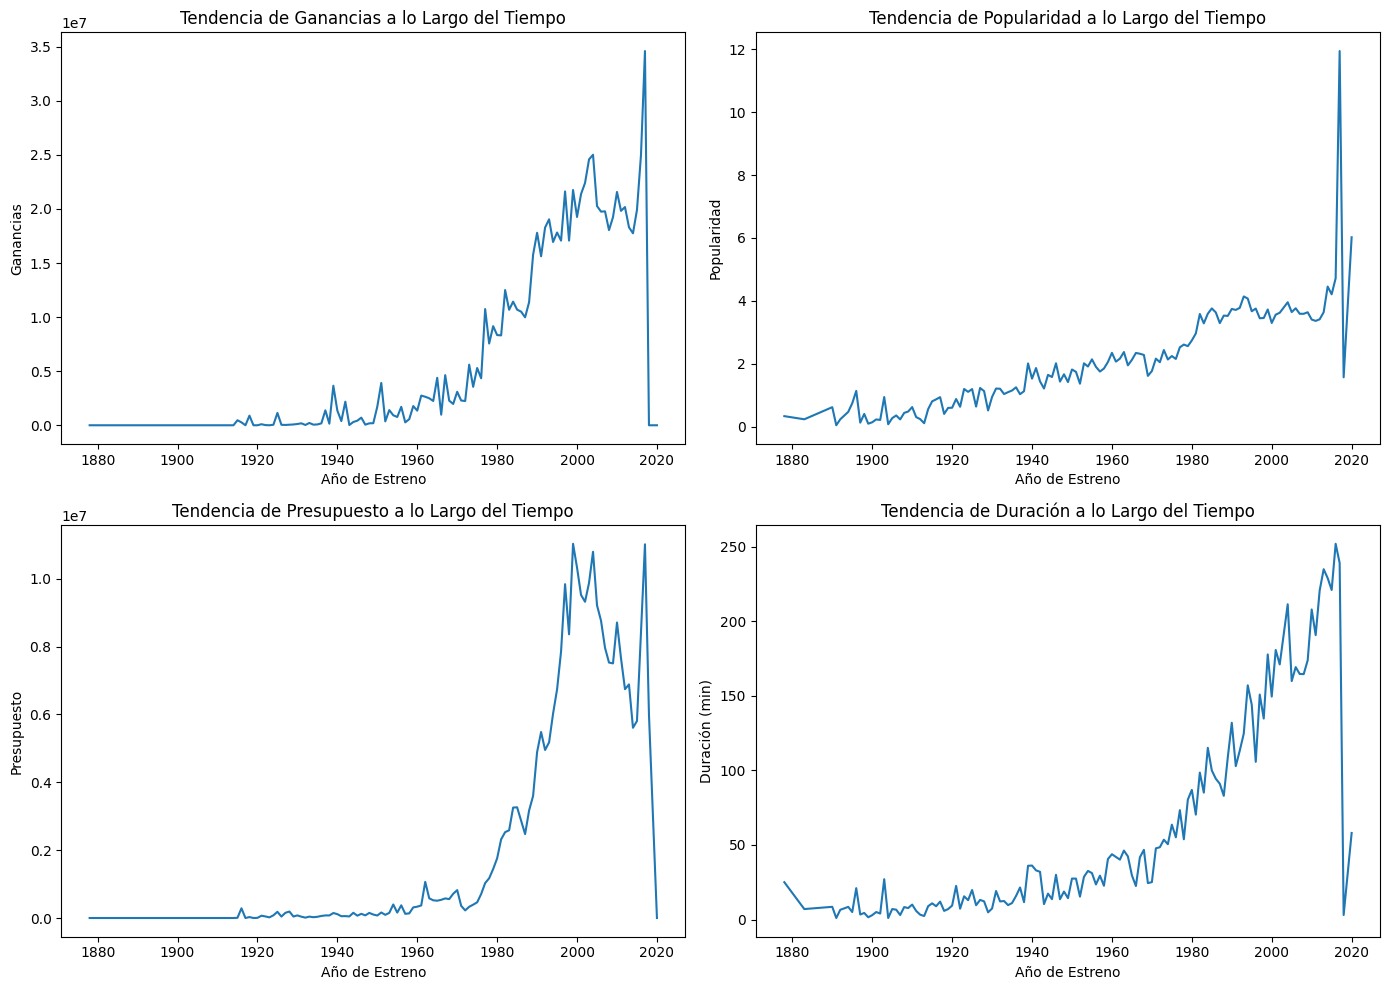

In [29]:
# Crear una figura con 2 columnas y 2 filas de subgráficos
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Tendencia de las ganancias a lo largo del tiempo
dataframe_unido.groupby('release_year')['revenue'].mean().plot(kind='line', ax=axs[0, 0])
axs[0, 0].set_title('Tendencia de Ganancias a lo Largo del Tiempo')
axs[0, 0].set_xlabel('Año de Estreno')
axs[0, 0].set_ylabel('Ganancias')

# Tendencia de la popularidad a lo largo del tiempo
dataframe_unido.groupby('release_year')['popularity'].mean().plot(kind='line', ax=axs[0, 1])
axs[0, 1].set_title('Tendencia de Popularidad a lo Largo del Tiempo')
axs[0, 1].set_xlabel('Año de Estreno')
axs[0, 1].set_ylabel('Popularidad')

# Tendencia del presupuesto a lo largo del tiempo
dataframe_unido.groupby('release_year')['budget'].mean().plot(kind='line', ax=axs[1, 0])
axs[1, 0].set_title('Tendencia de Presupuesto a lo Largo del Tiempo')
axs[1, 0].set_xlabel('Año de Estreno')
axs[1, 0].set_ylabel('Presupuesto')

# Tendencia de la duración a lo largo del tiempo
dataframe_unido.groupby('release_year')['vote_count'].mean().plot(kind='line', ax=axs[1, 1])
axs[1, 1].set_title('Tendencia de Duración a lo Largo del Tiempo')
axs[1, 1].set_xlabel('Año de Estreno')
axs[1, 1].set_ylabel('Duración (min)')

# Ajustar la disposición de los subgráficos
plt.tight_layout()
plt.show()



----------------------------------------
### Analisis 

Tendencia de Ganancias a lo Largo del Tiempo:

* Interpretación: Se observa un aumento general en las ganancias desde 1980, con un notable incremento en los últimos años, lo que sugiere un crecimiento en la industria cinematográfica.

Tendencia de Popularidad a lo Largo del Tiempo:
* Interpretación: La popularidad muestra un aumento significativo a partir de 2000, alcanzando picos en años recientes. Esto podría reflejar un cambio en las preferencias del público o el impacto de las redes sociales y plataformas de streaming.

Tendencia de Presupuesto a lo Largo del Tiempo:
* Interpretación: Aunque hay fluctuaciones, se observa una tendencia general al alza en los presupuestos, especialmente en la última década. Esto puede estar relacionado con el aumento de la producción de películas de gran presupuesto y efectos especiales.

Tendencia de Duración a lo Largo del Tiempo:

* Interpretación: La duración promedio ha ido en aumento, lo que podría indicar que las películas se están volviendo más largas, posiblemente debido a la inclusión de más contenido o historias más complejas.
Conclusiones Generales: 
* Estos gráficos proporcionan una visión clara de cómo han evolucionado diferentes caracteristicas a lo largo del tiempo. Las tendencias en ganancias y popularidad sugieren un crecimiento en la industria, mientras que el aumento en los presupuestos y la duración de las películas podría reflejar cambios en la producción y en las expectativas.

----------------------------------------

### 12. Limpieza de datos para el archivo final

In [30]:
# Teniendo en cuenta los graficos de las tendencias temporales se toma la decision de quitar las peliculas lanzadas antes de 1980

dataframe_unido = dataframe_unido[dataframe_unido['release_year'] > 1980]

# Teniendo en cuenta que estamos tomando datos para una recomendacion de peliculas filtramos solamente las peliculas que fueron lanzadas
dataframe_unido = dataframe_unido[dataframe_unido['status'] == 'Released']

# Reemplazar los valores nulos oara evitar errores
dataframe_unido['name_genre'] = dataframe_unido['name_genre'].fillna('')
dataframe_unido['cast_name_actor'] = dataframe_unido['cast_name_actor'].fillna('')
dataframe_unido['crew_name_member'] = dataframe_unido['crew_name_member'].fillna('')
dataframe_unido['overview'] = dataframe_unido['overview'].fillna('')

# para la creacion de un archivo exclusivo para el modelo de recomendacion selecciono las columnas necesarias a mantener
columnas_a_mantener = [
    'id_movies','budget', 'revenue', 'vote_count', 'popularity', 
    'name_genre', 'cast_name_actor', 
    'crew_name_member', 'overview','crew_job','title','release_year'
]

# Filtro las columnas necesarias
dataframe_unido = dataframe_unido[columnas_a_mantener]

# Renombro 'id_movies' como 'id', no añado id_credits por que tienen los mismos valores
dataframe_unido = dataframe_unido.rename(columns={'id_movies': 'id'})

# Guardo el dataframe como parquet
dataframe_unido.to_parquet('../Datasets/dataset_unido_modelo', index=False)

# confirmo la cantidad de datos que se mantienen dentro del nuevo archivo
dataframe_unido.shape

(24004, 12)